# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mohga Aly Elbarbary

ID:55-1706

Tutorial:4

---

Name:Yara Ahmed Eassa

ID:55-12320

Tutorial:4

---



## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FixedLocator
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
!pip install graphviz
from sklearn.ensemble import RandomForestClassifier



%matplotlib inline
plt.style.use('seaborn-v0_8')

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check       $29.85/m       $29.85    No  
1               Mailed check       $56.95/m      $1889.5    No  
2               Mailed check       $53.85/m      $108.15   Yes  
3  Bank transfer (automatic)        $42.3/m     $1840.75    No  
4           Electronic check        $70.7/m      $151.65   Yes  

[5 rows x 21 columns]

## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

Here , we were checking for null values in columns and we found in the customer ID and total charges

In [ ]:
df.describe()

SeniorCitizen       tenure
count    7032.000000  7032.000000
mean        0.162400    32.421786
std         0.368844    24.545260
min         0.000000     1.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

we used this method to have an overview of the data and how it is distributed

In [ ]:
df.duplicated().sum()

0

We were tryng to see if there are duplicate rows and there are none

In [ ]:
df.shape

(7032, 21)

Here we wanted to know the size of the data set in terms of number of rows and columns.

In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

Here we simply printed all the unique values in all columns

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


Here we simply printed the number of unique values in all columns, and customer ID doesnt have any unique info so we will drop it later.

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


Here we just wanted to view all our cateogical columns and their unique values, from this we indentified "contract" to be an ordinal categorical attribute. which will be handled later.

## Data Cleaning

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['MonthlyCharges ($/m)'] = df_copy['MonthlyCharges'].str.replace('/m', '').str.replace('$', '', regex=False)
df_copy['TotalCharges ($)'] = df_copy['TotalCharges'].str.replace('$', '', regex=False)
df_copy['MonthlyCharges ($/m)'] = pd.to_numeric(df_copy['MonthlyCharges ($/m)'], errors='coerce')
df_copy['TotalCharges ($)'] = pd.to_numeric(df_copy['TotalCharges ($)'], errors='coerce')
df_copy.drop(['MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)
df_copy.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod Churn MonthlyCharges ($/m)  TotalCharges ($)  
0           Electronic check    No                29.85             29.85  
1               Mailed check    No                56.95           1889.50  
2               Mailed check   Yes                53.85            108.15  
3  Bank transfer (automatic)    No                42.30           1840.75  
4           Electronic check   Yes                70.70            151.65  

[5 rows x 21 columns]

We converted to nuemrical and created new columns for monthly and total charges as they had $ and /m as shown in the inspection part.

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            6976 non-null   object 
 1   gender                7032 non-null   object 
 2   SeniorCitizen         7032 non-null   int64  
 3   Partner               7032 non-null   object 
 4   Dependents            7032 non-null   object 
 5   tenure                7032 non-null   int64  
 6   PhoneService          7032 non-null   object 
 7   MultipleLines         7032 non-null   object 
 8   InternetService       7032 non-null   object 
 9   OnlineSecurity        7032 non-null   object 
 10  OnlineBackup          7032 non-null   object 
 11  DeviceProtection      7032 non-null   object 
 12  TechSupport           7032 non-null   object 
 13  StreamingTV           7032 non-null   object 
 14  StreamingMovies       7032 non-null   object 
 15  Contract             

Here it shows that the data type has changed.

In [ ]:
df_copy.drop(['customerID'], axis="columns", inplace=True)

In [ ]:
df_copy.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod Churn  MonthlyCharges ($/m)  \
0              Yes           Electronic check    No                 29.85   
1               No               Mailed check    No                 56.95   
2              Yes               Mailed check   Yes                 53.85   
3               No  Bank transfer (automatic)    No                 42.30   
4              Yes           Electronic check   Yes                 70.70   

   TotalCharges ($)  
0             29.85  
1           1889.50  
2            108.15  
3           1840.75  
4            151.65

We dropped the customerID column as it was unique for all rows so it does not add any useful information to the classification

In [ ]:
df_copy['Contract'] = pd.Categorical(df_copy['Contract'],
                                     categories=['Month-to-month', 'One year', 'Two year'],
                                     ordered=True)

df_copy['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

Here we specified contract as an ordinal categorical column and now we can simply use binary ccomparisions on it as show below.

In [ ]:
df_copy[df_copy['Contract'] <= 'One year']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7025  Female              0      No         No      12           No   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7025  No phone service             DSL             No          Yes   
7027               Yes             DSL            Yes           No   
7028               Yes     Fiber optic             No          Yes   
7029  No phone service             DSL            Yes           No   
7030               Yes     Fiber optic             No           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7025              Yes         Yes         Yes             Yes        One year   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   

     PaperlessBilling              PaymentMethod Churn  MonthlyCharges ($/m)  \
0                 Yes           Electronic check    No                 29.85   
1                  No               Mailed check    No                 56.95   
2                 Yes               Mailed check   Yes                 53.85   
3                  No  Bank transfer (automatic)    No                 42.30   
4                 Yes           Electronic check   Yes                 70.70   
...               ...                        ...   ...                   ...   
7025               No           Electronic check    No                 60.65   
7027              Yes               Mailed check    No                 84.80   
7028              Yes    Credit card (automatic)    No                103.20   
7029              Yes           Electronic check    No                 29.60   
7030              Yes               Mailed check   Yes                 74.40   

      TotalCharges ($)  
0                29.85  
1              1889.50  
2               108.15  
3              1840.75  
4               151.65  
...                ...  
7025            743.30  
7027           1990.50  
7028           7362.90  
7029            346.45  
7030            306.60  

[5347 rows x 20 columns]

We were trying to use it > operation on the column to see how many rows have less than one year contract

In [ ]:
df_copy['Churn'] = df_copy['Churn'].astype('category').cat.codes
df_copy['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

We encoded the yes and no in our dependent attribute "churn" to 0 and 1

In [ ]:
df_copy['TotalCharges ($)'] = df_copy['TotalCharges ($)'].fillna(df_copy['MonthlyCharges ($/m)'] * df_copy['tenure'])
df_copy[['MonthlyCharges ($/m)', 'tenure', 'TotalCharges ($)']].head()

MonthlyCharges ($/m)  tenure  TotalCharges ($)
0                 29.85       1             29.85
1                 56.95      34           1889.50
2                 53.85       2            108.15
3                 42.30      45           1840.75
4                 70.70       2            151.65

Here we used feature engineering to impute the null values in the total charges column by multiplying the monthly charges by the tenure. This is the most optimum way to fill in nulls because tenure is essentially how long a customer has used the service and multiplying it by the monthly charges will give you a close more accurate result than using a mean.

In [ ]:
df_copy.isnull().sum()

gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
Churn                   0
MonthlyCharges ($/m)    0
TotalCharges ($)        0
dtype: int64

Then we checked for null values in the total charges to make sure our method worked

## Exploratory Data Analysis

In [ ]:
df_copy['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

We checked to know if there is class inbalance or not and there is as most of them did not churn.

In [ ]:
df_copy['Churn'].value_counts() / df_copy['Churn'].count()

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

We calculated the percentage for better understanding of the values

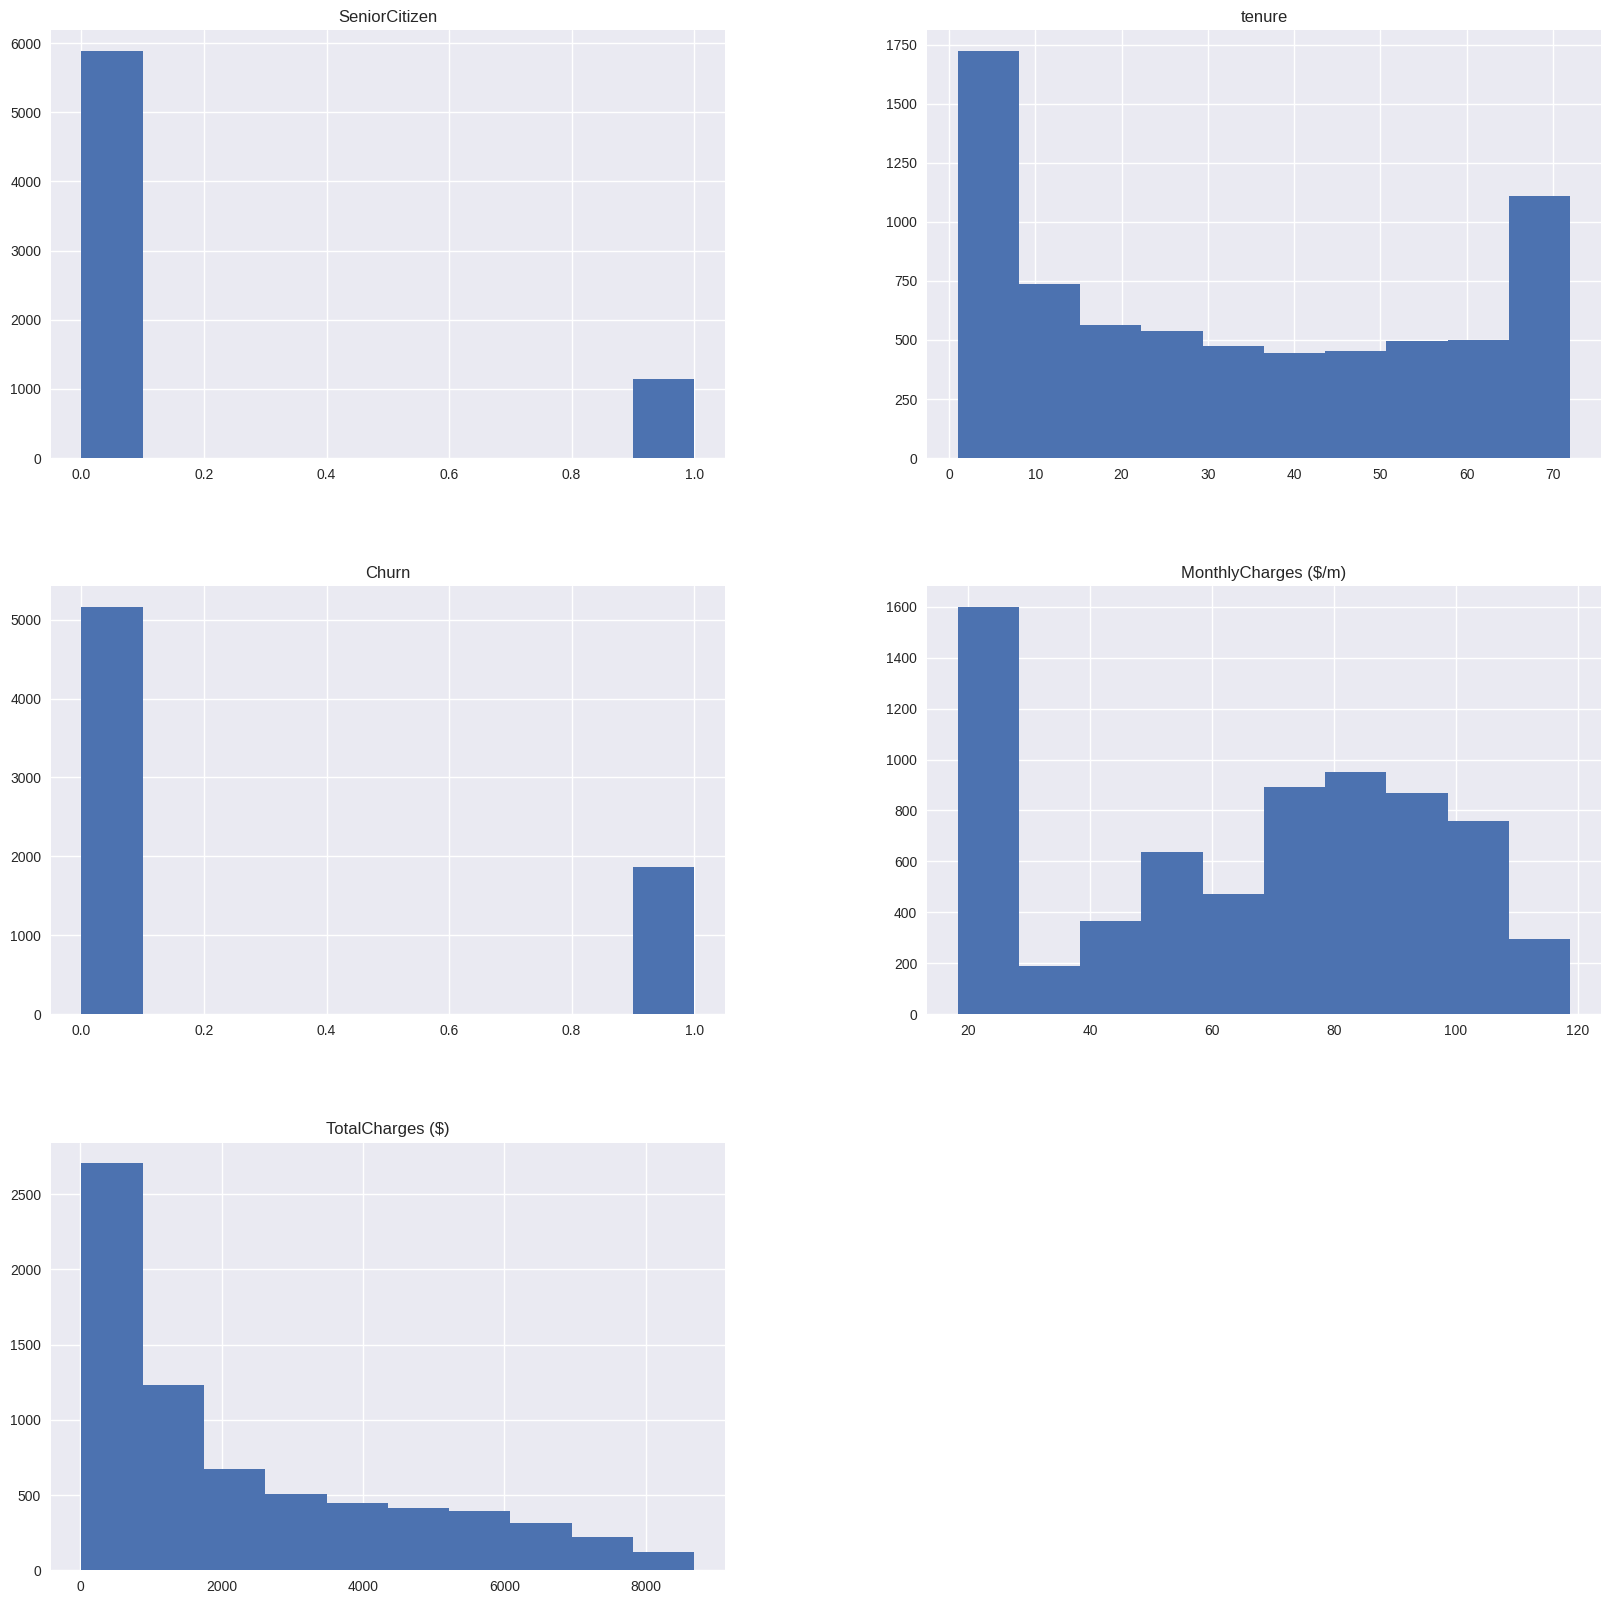

In [ ]:
df_copy.hist(figsize=(20, 20));

In [ ]:
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')
categorical_features.remove('MonthlyCharges')
categorical_features.remove('TotalCharges')
categorical_features.remove('customerID')
for column in categorical_features:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


We removed the churn , Monthly and total charges from categorical columns since they are numerical and we already encoded the churn so we removed that too. So we will need this to convert the rest to numerical later on (encoding).

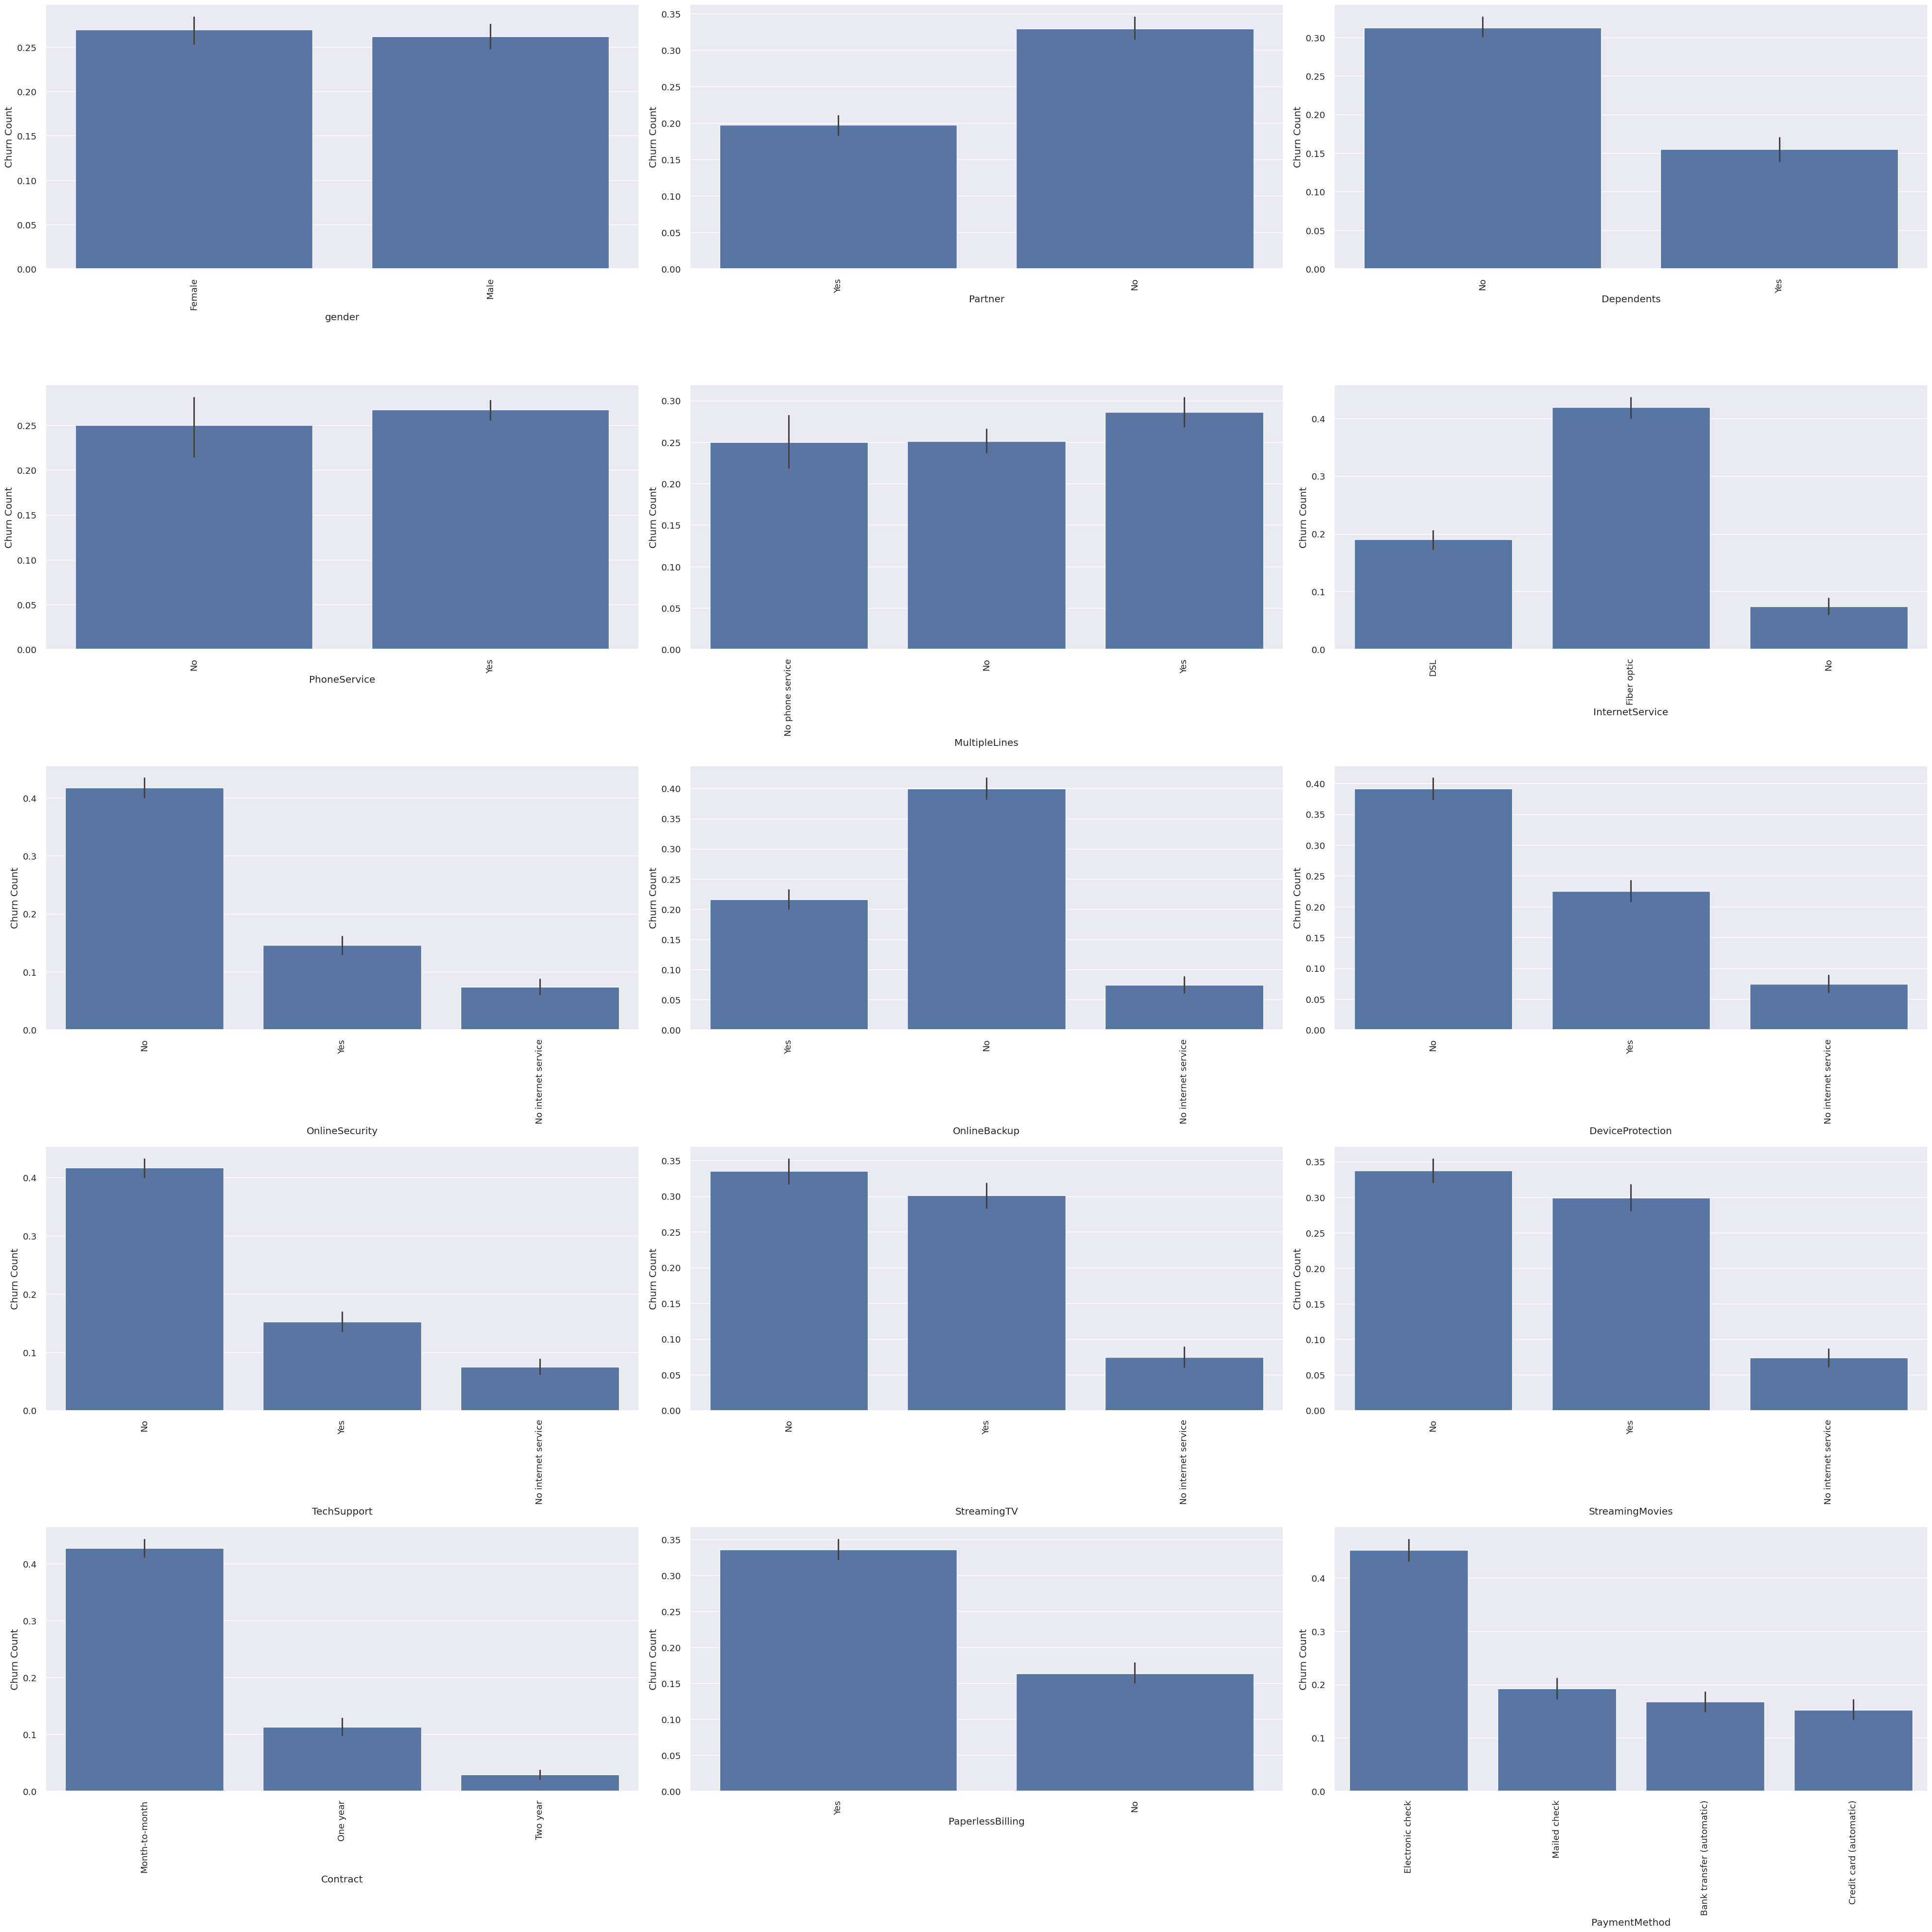

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))
num_cols = 3
num_rows = int(np.ceil(len(categorical_features) / num_cols))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    g = sns.barplot(x=column, y='Churn', data=df_copy)
    ticks = g.get_xticks()
    g.xaxis.set_major_locator(FixedLocator(ticks))
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')
plt.tight_layout()
plt.show()

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

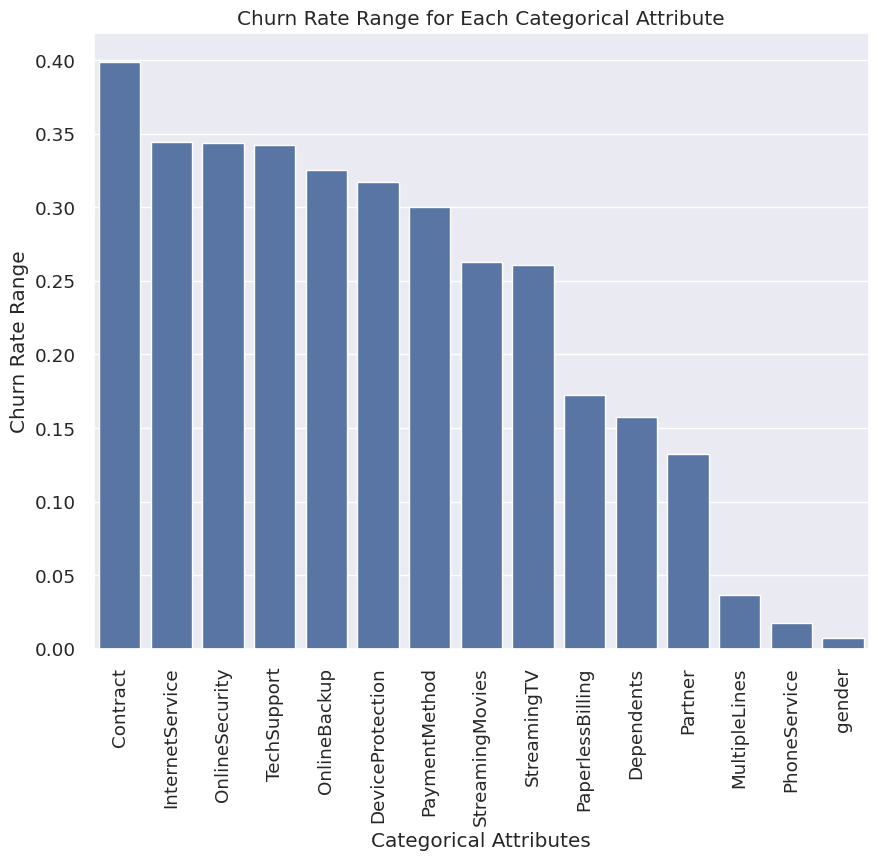

In [ ]:
churn_rate_range = {}
for column in categorical_features:
    churn_rate_by_category = df_copy.groupby(column, observed=False)['Churn'].mean()  # Mean churn rate per category
    churn_rate_range[column] = churn_rate_by_category.max() - churn_rate_by_category.min()
churn_rate_range_df = pd.DataFrame.from_dict(churn_rate_range, orient='index', columns=['ChurnRateRange'])
churn_rate_range_df = churn_rate_range_df.sort_values(by='ChurnRateRange', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_rate_range_df.index, y=churn_rate_range_df['ChurnRateRange'])
plt.xticks(rotation=90)
plt.ylabel("Churn Rate Range")
plt.xlabel("Categorical Attributes")
plt.title("Churn Rate Range for Each Categorical Attribute")
plt.show()

Here, we checked corrleation of the categorical attributes with churn by using a bar plot and calculated a range of churn rates across categories for each column. The higher the rate the higher the correlation.

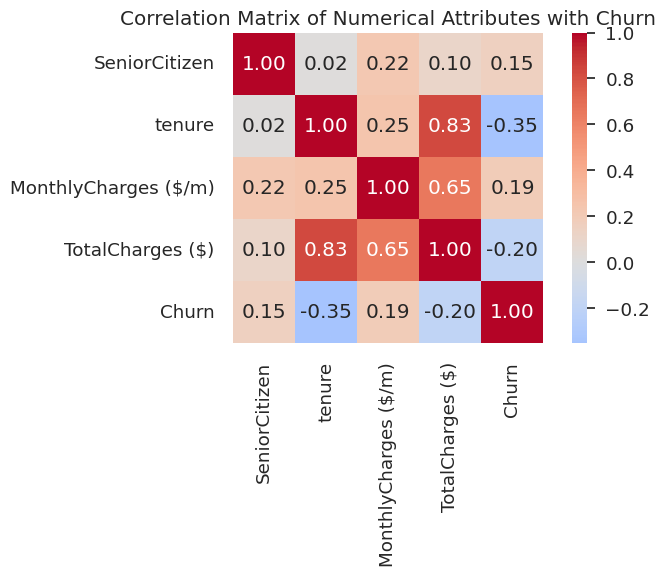

In [ ]:
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges ($/m)', 'TotalCharges ($)']
correlation_matrix = df_copy[numerical_features + ['Churn']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix of Numerical Attributes with Churn")
plt.tight_layout()
plt.show()

Here we used a heat map to visualize correlation of numerical attributes with churn.

**Answer for Q1**: We have provided 2 visuals. For categorical attributes, contracts show the highest correlation with churn. While for numerical attributes, monthly charges shows the highest correlation with churn.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

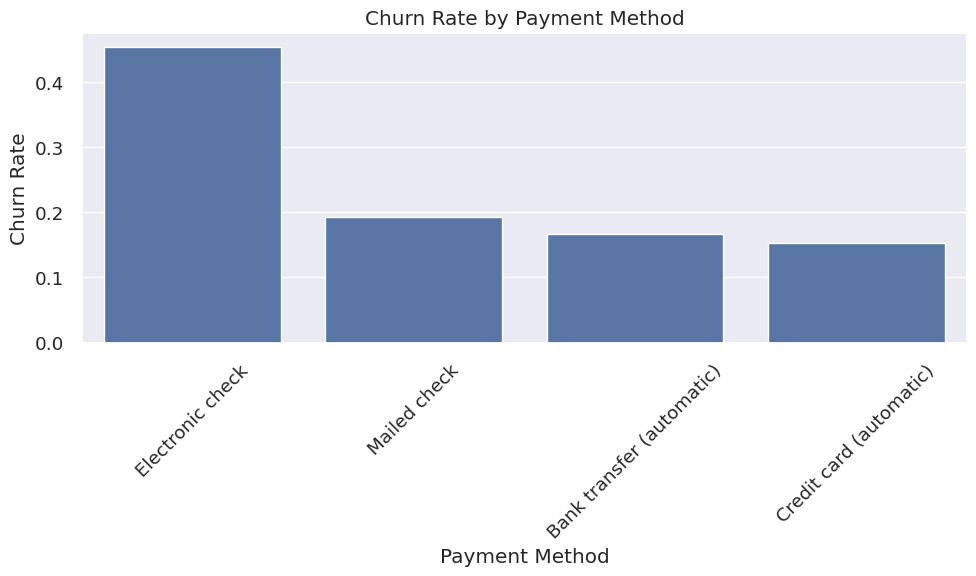

In [ ]:
churn_rate_by_payment = df_copy.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_payment.index, y=churn_rate_by_payment.values)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Answer for Q2**: Eelectronic check has the highest correlation.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

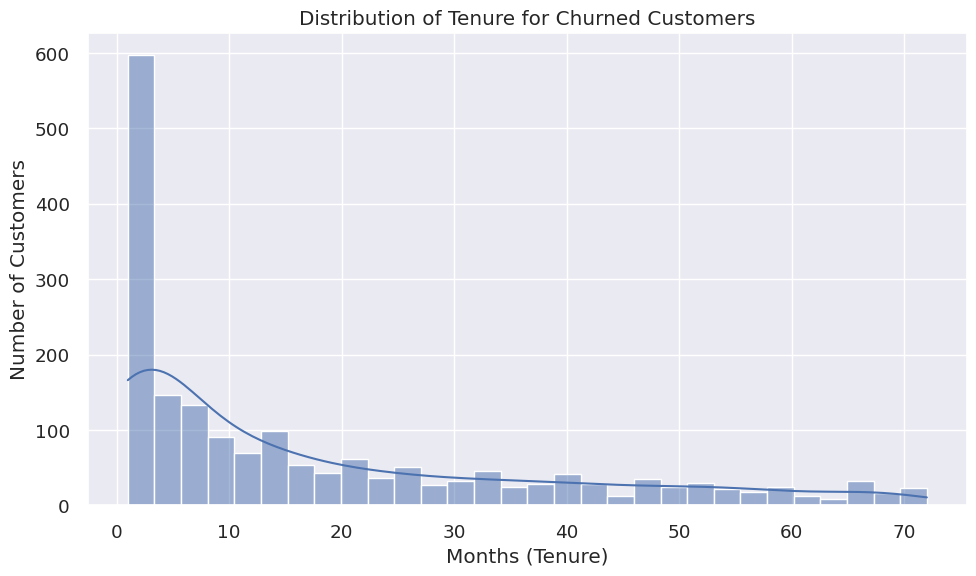

In [ ]:
churned_customers = df_copy[df_copy['Churn'] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], kde=True, bins=30)
plt.xlabel('Months (Tenure)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Tenure for Churned Customers')
plt.tight_layout()
plt.show()

**Answer for Q3**: Customers usually churn the most during early months, specifically months 0-1 and then the churn rate declines gradually as time passes.

## Data Preparation for Modelling

In [ ]:
df_encoded = df_copy.copy()

In [ ]:
label_encoder = LabelEncoder()
df_encoded['Contract'] = label_encoder.fit_transform(df_encoded['Contract'])
df_encoded = pd.get_dummies(df_encoded, columns=[col for col in categorical_features if col != 'Contract'], drop_first=True)
print(df_encoded.head())

   SeniorCitizen  tenure  Contract  Churn  MonthlyCharges ($/m)  \
0              0       1         0      0                 29.85   
1              0      34         1      0                 56.95   
2              0       2         0      1                 53.85   
3              0      45         1      0                 42.30   
4              0       2         0      1                 70.70   

   TotalCharges ($)  gender_Male  Partner_Yes  Dependents_Yes  \
0             29.85        False         True           False   
1           1889.50         True        False           False   
2            108.15         True        False           False   
3           1840.75         True        False           False   
4            151.65        False        False           False   

   PhoneService_Yes  ...  TechSupport_No internet service  TechSupport_Yes  \
0             False  ...                            False            False   
1              True  ...                          

Here we made label encoding to the contract and one hot encoding to the remaining categorical attributes.Then we dropped the redundant attributes that gets created.

In [ ]:
df_encoded = df_encoded.astype(int)
print(df_encoded.head())

   SeniorCitizen  tenure  Contract  Churn  MonthlyCharges ($/m)  \
0              0       1         0      0                    29   
1              0      34         1      0                    56   
2              0       2         0      1                    53   
3              0      45         1      0                    42   
4              0       2         0      1                    70   

   TotalCharges ($)  gender_Male  Partner_Yes  Dependents_Yes  \
0                29            0            1               0   
1              1889            1            0               0   
2               108            1            0               0   
3              1840            1            0               0   
4               151            0            0               0   

   PhoneService_Yes  ...  TechSupport_No internet service  TechSupport_Yes  \
0                 0  ...                                0                0   
1                 1  ...                          

Here we converted the boolean values to 0s and 1s

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          7032 non-null   int64
 1   tenure                                 7032 non-null   int64
 2   Contract                               7032 non-null   int64
 3   Churn                                  7032 non-null   int64
 4   MonthlyCharges ($/m)                   7032 non-null   int64
 5   TotalCharges ($)                       7032 non-null   int64
 6   gender_Male                            7032 non-null   int64
 7   Partner_Yes                            7032 non-null   int64
 8   Dependents_Yes                         7032 non-null   int64
 9   PhoneService_Yes                       7032 non-null   int64
 10  MultipleLines_No phone service         7032 non-null   int64
 11  MultipleLines_Yes             

In [ ]:
df_encoded.head()

SeniorCitizen  tenure  Contract  Churn  MonthlyCharges ($/m)  \
0              0       1         0      0                    29   
1              0      34         1      0                    56   
2              0       2         0      1                    53   
3              0      45         1      0                    42   
4              0       2         0      1                    70   

   TotalCharges ($)  gender_Male  Partner_Yes  Dependents_Yes  \
0                29            0            1               0   
1              1889            1            0               0   
2               108            1            0               0   
3              1840            1            0               0   
4               151            0            0               0   

   PhoneService_Yes  ...  TechSupport_No internet service  TechSupport_Yes  \
0                 0  ...                                0                0   
1                 1  ...                                0                0   
2                 1  ...                                0                0   
3                 0  ...                                0                1   
4                 1  ...                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 30 columns]

Here we checked that everything is encoded nciely.

## Modelling

In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here we split the data for training and testing.We train the model on 70% of data and test on the remaining 30%.

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Here we create a decision tree classifier and train it.

### Tree Visualization

In [ ]:
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

Here we turn the tree data into something we can visualize and lableds target classes as yes (churned) and no (not churned).

In [ ]:
graph

Here the tree visual is printed

In [ ]:
graph.render('Churn')

'Churn.pdf'

We rendered the graph to be able to save it as a pdf and download it as shown below.

In [ ]:
files.download("Churn.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Evaluation

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Here we define a function to print the evaluation metrics.

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.05%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.988764     0.995287  0.990451     0.992025      0.990497
recall        0.998340     0.968654  0.990451     0.983497      0.990451
f1-score      0.993529     0.981790  0.990451     0.987659      0.990409
support    3614.000000  1308.000000  0.990451  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3608    6]
 [  41 1267]]

Test Result:
Accuracy Score: 73.70%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.824413    0.505190  0.736967     0.664801      0.739539
recall        0.815365    0.520499  0.736967     0.667932      0.736967
f1-score      0.819864    0.512730  0.736967     0.666297      0.738204
support    1549.000000  561.000000  

We used the function on the training and testing data separately to print the evaluation metrics. In training, the accuracy is very high (99.05%) as it automatically overfit to the data available since we are still training and the same goes for the rest of the evaluation metrics.For the confusion matrix, it classified mostly correct but had 6 false postives and 41 false negatives.

In Testing, the model had accuracy of (73.70%) which indicates very good performance buts it is lower than the training since it was overfitted. For the classification report, the model predicted some instances wrong. For example, in class 1 there were 50.5% classified correctly as shown by precision. Regarding recall for class 1, model correctly identified 52.04% of all actual 1 instances.The F1 score of class 1 51.2% shows that the model poorly predicts the churned customers. The values of predicting class 0 were significantly higher as there is class inbalance in the data set for the NO. For the confusion matrix, the model classified with less accuracy during testing. The values of false positive and false negative increased significantly as the precision and recall values declined. It is recommended to look at the values of the precision and recall not the accuracy due to the class inbalace towards No and we are intrested in yes (customers who actually churned).

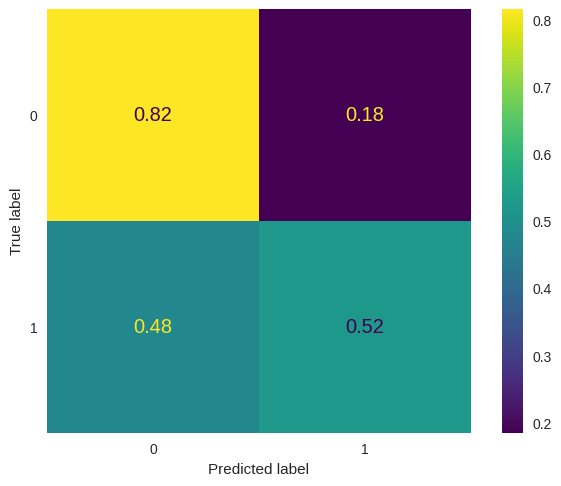

In [ ]:
cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

This visual shows the confusion matrix of test data. The numbers are calculated as percentage of predictions. The accuracy of the true negative class is the highest.

In [ ]:
pred = tree_clf.predict(X_test)
print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.5051903114186851
Recall:  0.5204991087344029
F1_score:  0.5127304653204565


Simplification of test evaluation metrics

## Bonus (Optional)

### Modelling

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

For the bonus, we choose the Random Forest, it simply creates multiple decision trees and each are trained independently on random parts of the data and columns to add diversity. When making predictions, each tree will give its own prediction and the forest combines all of them based on the majority prediction. This is known to usually produce better performance than just a single tree as done above. So we created it here and trained it on the same dataset the decision tree above was trained on (70% training, and 30% testing).

Here, it will create by default 100 trees since we didnt specify a specific number of trees to be created.

### Random Forest Visualization

In [ ]:
tree_in_forest = rf_clf.estimators_[0]
dot_data = export_graphviz(tree_in_forest, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

Here we wanted to visualize the Random Forest, but it visualizes only 1 tree, as indicated in the "[0]" this visualizes the first tree, due to complexity issues.

In [ ]:
graph

In [ ]:
graph.render("Random_Forest_Tree")

'Random_Forest_Tree.pdf'

In [ ]:
files.download("Random_Forest_Tree.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here we did same as with the decision tree, it was rendered and downloaded as a PDF.

### Random Forest Evaluation

In [ ]:
def evaluate_model(rf_clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = rf_clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Random Forest - Training Set Results")
        print("===============================================")
        print(f"Number of trees (n_estimators): {rf_clf.n_estimators}")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = rf_clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Random Forest - Test Set Results")
        print("===============================================")
        print(f"Number of trees (n_estimators): {rf_clf.n_estimators}")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Here, we created a method to print the evaluation metrics just as above but with the addition of puting the model name to easily compare the random forest perfomance with the decision tree performance.

In [ ]:
evaluate_model(rf_clf, X_train, y_train, X_test, y_test, train=True)
evaluate_model(rf_clf, X_train, y_train, X_test, y_test, train=False)

Random Forest - Training Set Results
Number of trees (n_estimators): 100
Accuracy Score: 99.05%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.993634     0.981665  0.990451     0.987650      0.990453
recall        0.993359     0.982416  0.990451     0.987888      0.990451
f1-score      0.993497     0.982041  0.990451     0.987769      0.990452
support    3614.000000  1308.000000  0.990451  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3590   24]
 [  23 1285]]

Random Forest - Test Set Results
Number of trees (n_estimators): 100
Accuracy Score: 78.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.829940    0.629545  0.788152     0.729743      0.776660
recall        0.894771    0.493761  0.788152     0.694266      0.

Here we applied the function to the random forest model.

The results of the decsion tree were explained above so here we will focus on the results of the random forest. For training, it had a 99.05% accuracy and high classification metric results as well just like it was in the decision tree model and this was due to overfitting to the training data. The confusion matrix also showed that it missclassified 24 as churned and 23 as not churned.

For testing, the accuracy was 78.82% which is abit higher than the accuracy resulted vy the decision tree (73.7%) however, we will not be considering accuracy mainly to compare because we have class imbalance as explained before. So, the classifcation metrics will be able to correctly compare between them.

Percision (0): is 0.83, while in the decision tree it was 0.82

Percision (1): is 0.63, while in the decision tree it was 0.50 (a significant improvement)

Recall (0): is 0.89, while in the decision tree it was 0.81 (a significant improvement)

Recall (1): is 0.49, while in the decision tree it was 0.52 (Lower score)

F1- score, the results here are much better than in the decision tree.

For the confusion matrix, it has missclassified 163 as churned (lower) and 284 as not churned (higher).

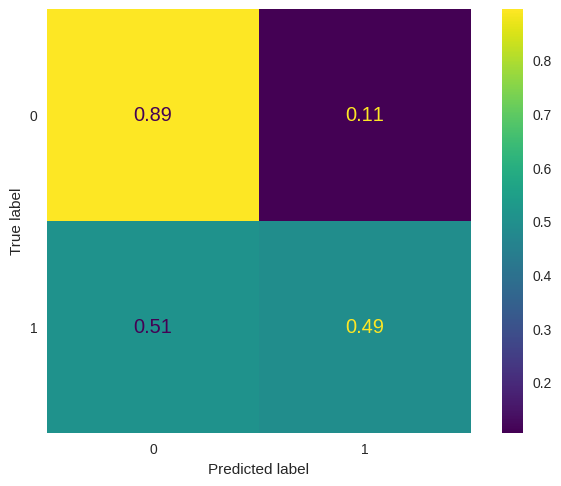

In [ ]:
cm = confusion_matrix(y_test, rf_clf.predict(X_test), labels=rf_clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

This is a visualization of the confusion matrix of the test results of the randome forest.

In [ ]:
pred = rf_clf.predict(X_test)
print('Precision: ', precision_score(y_test, pred))
print('=======================================')
print('Recall: ', recall_score(y_test, pred))
print('=======================================')
print('F1_score: ', f1_score(y_test, pred))

Precision:  0.6295454545454545
Recall:  0.49376114081996436
F1_score:  0.5534465534465535


These are the final metrics and their results that we will compare with the decsion tree's results due to the imbalance (these are just the results of class 1).

### Bonus Conclusion

Given that there is an imbalance in the classes, we will prioritize precision, recall, and the F1-score over accuracy to compare, especially for class 1 (our target).

The random forest model shows higher precsion in both classes when compared with the decision tree and a significant improvement in the precsion of class 1 which will reduce false positives.

The recall in the random forest is slightly lower for class 1, but this difference is minor which could be overlooked due to the great improvements seen in precision.

The F1-score in random forest is higher in both classes, meaning it is better at capturing balance between false positives and false negatives compared with decision trees.

Based on that, **we recommend using the random forest model** instead. Despite it having lower recall in class 1 it performs much better in precision and the F1-Score.
